# PRELECTURE

## Question 1

1. **the difference between Simple Linear Regression and Multiple Linear Regression; and the benefit the latter provides over the former:**
- Simple Linear Regression (SLR) models the relationship between a single predictor variable and an outcome variable: Outcome = β₀ + β₁(Predictor₁)
- Multiple Linear Regression (MLR) extends this by modeling the outcome based on multiple predictors, which may include continuous and indicator variables: Outcome = β₀ + β₁(Predictor₁) + β₂(Predictor₂) + … + βₙ(Predictorₙ) MLR allows for a more complex model that can better explain variations in the outcome by incorporating additional relevant predictors, capturing interactions and relationships that SLR cannot.

2. **Continuous vs. Indicator Variable in Simple Linear Regression:**
- A continuous variable in SLR represents a range of numeric values, contributing proportionally to the outcome based on its value.

- An indicator (binary) variable takes on values of 0 or 1, “turning on” or “off” a condition in the model.

**Example forms:** 
- Continuous: Outcome = β₀ + β₁(Continuous_Predictor) 
- Indicator: Outcome = β₀ + β₁1(Condition)

Difference: Continuous variables allow smooth variation in the outcome, while indicator variables produce a distinct shift based on category membership.

3. **Model Behavior with a Continuous and Indicator Variable in MLR:**
- When a continuous and an indicator variable are included, the model accounts for both general trends and distinct shifts due to categories, enhancing the model’s fit to segmented data.

Outcome = β₀ + β₁(Continuous_Predictor) + β₂1(Category)

Change in behavior: The model now captures separate “levels” in the outcome across the indicator’s categories, adjusting the effect of the continuous predictor based on category.

4. **Effect of Adding an Interaction between Continuous and Indicator Variables in MLR:**
- Adding an interaction term allows the continuous predictor’s effect on the outcome to vary depending on the category, effectively creating separate slopes for different groups.

Outcome = β₀ + β₁(Continuous_Predictor) + β₂1(Category) + β₃(Continuous_Predictor)×1(Category)

Effect: The interaction term introduces different relationships for the continuous predictor within each category, allowing the model to better capture group-specific trends.

5. **Behavior of MLR with Only Indicator Variables for a Non-Binary Categorical Variable:**
- For a categorical variable with  k  categories, MLR uses  k-1  binary indicator variables to capture group differences relative to a “baseline” category. The baseline acts as a reference level, with other categories compared to it.

Example form for three categories (Category A as baseline):
- Outcome = β₀ + β₁1(Category_B) + β₂1(Category_C)

Behavior: This model structure allows different intercepts for each category, representing each group’s average outcome. Each indicator variable (binary encoding) “turns on” for specific categories, comparing them against the baseline and ensuring the model isn’t over-parameterized.

## Question 2:

**Identifying Variables**
- Outcome variable: The sales revenue generated by the company’s advertising campaigns (e.g., Sales).
- Predictor variables: The budget for TV advertising (TV_Budget) and the budget for online advertising (Online_Budget).
    
**Considering Interactions**
- Given that the effectiveness of each advertising medium may be influenced by spending in the other medium, an interaction effect between TV_Budget and Online_Budget is meaningful. For example, a high online ad spend might boost the effectiveness of TV ads, or vice versa.

**Linear Formulas Without and With Interaction**

- Without Interaction:

$Sales = \beta_0 + \beta_1(\text{TV_Budget}) + \beta_2(\text{Online_Budget})$

In this model, the contributions from TV and online advertising are assumed to be independent of each other; each dollar spent on either advertising medium has a fixed effect on sales, regardless of the other.

- With Interaction:

$Sales = \beta_0 + \beta_1(\text{TV_Budget}) + \beta_2(\text{Online_Budget}) + \beta_3(\text{TV_Budget} \times \text{Online_Budget})$

Here, the interaction term (\TV_Budget * Online_Budget) allows the effect of spending on one medium to vary depending on the level of spending on the other. For instance, the sales response to TV ad spend could increase if more is also being spent online.

**Using These Models for Predictions**
- Without Interaction: To predict sales, you’d plug in the values for TV_Budget and Online_Budget, and each dollar amount contributes independently to the outcome. This model may underpredict or overpredict sales if there’s a synergistic effect between the two types of advertising that it does not capture.

- With Interaction: Here, by including the interaction term, the model can adjust the effect of one type of advertising based on the other’s budget. Predictions will reflect this interdependence, potentially resulting in higher or lower predicted sales than the additive model in scenarios where one medium enhances the effectiveness of the other.

**Updating the Models for High/Low (Binary) Advertising Budgets**
- If TV_Budget and Online_Budget are instead categorized as “high” (1) or “low” (0), each becomes a binary predictor. The models would be adjusted as follows:

Without Interaction:

$Sales = \beta_0 + \beta_1 \cdot \text{TV_High} + \beta_2 \cdot \text{Online_High}$

where TV_High and Online_High are binary indicators that equal 1 when the budget is high for that medium and 0 otherwise.

With Interaction:

$Sales = \beta_0 + \beta_1 \cdot \text{TV_High} + \beta_2 \cdot \text{Online_High} + \beta_3 \cdot (\text{TV_High} \times \text{Online_High})$

Here, the interaction term (TV_High} * Online_High) captures the combined effect of having both advertising budgets high. This model allows for more nuanced predictions, reflecting that the impact of high TV advertising may differ if online advertising is also high.
- High-Level Difference in Predictions:
- The without interaction model predicts sales based solely on the presence of high budgets in either medium, assuming these effects are additive.
- The with interaction model predicts based on combinations, acknowledging that having both high budgets might lead to a different effect on sales than just adding the two individual effects.

## Question 3: smf to Fit MLR Models

In [1]:
import pandas as pd
import statsmodels.formula.api as smf

# Example setup with a hypothetical dataset for demonstration
data = pd.DataFrame({
    'high_connection': [0, 1, 1, 0, 1, 0, 1, 0],  # Binary outcome
    'age': [25, 34, 45, 23, 31, 50, 40, 29],      # Continuous predictor
    'internet_usage': [1, 1, 0, 0, 1, 1, 0, 0]    # Binary predictor
})

# Fit logistic regression model without interaction
formula = 'high_connection ~ age + internet_usage'
log_reg_additive = smf.logit(formula, data=data).fit()
print(log_reg_additive.summary())

Optimization terminated successfully.
         Current function value: 0.640186
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        high_connection   No. Observations:                    8
Model:                          Logit   Df Residuals:                        5
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                 0.07641
Time:                        20:13:59   Log-Likelihood:                -5.1215
converged:                       True   LL-Null:                       -5.5452
Covariance Type:            nonrobust   LLR p-value:                    0.6546
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -2.6119      3.168     -0.824      0.410      -8.821       3.597
age              

The additive model here predicts the likelihood of high social connection based on age and internet usage, where each coefficient represents the log-odds impact of that predictor on the outcome. Assuming coefficients for both age and internet usage are significant, we can interpret these variables as contributing meaningfully to the odds of high social connection. Specifically, a positive coefficient would indicate an increase in log-odds (and hence probability) of high social connection.

In [2]:
# Fit logistic regression model with interaction term
formula_interaction = 'high_connection ~ age * internet_usage'
log_reg_interaction = smf.logit(formula_interaction, data=data).fit()
print(log_reg_interaction.summary())

         Current function value: 0.327801
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:        high_connection   No. Observations:                    8
Model:                          Logit   Df Residuals:                        4
Method:                           MLE   Df Model:                            3
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                  0.5271
Time:                        20:13:59   Log-Likelihood:                -2.6224
converged:                      False   LL-Null:                       -5.5452
Covariance Type:            nonrobust   LLR p-value:                    0.1194
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -126.3841   1.06e+05     -0.001      0.999   -2.08e+05    2.07e+05
age                    3.6680   3108.842 

/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The coefficient for the interaction term (age × internet_usage) reveals whether the effect of age on high social connection changes based on internet usage. A significant interaction term would suggest that the influence of age on social connection is conditional on the level of internet usage, capturing more complex relationships than the additive model.

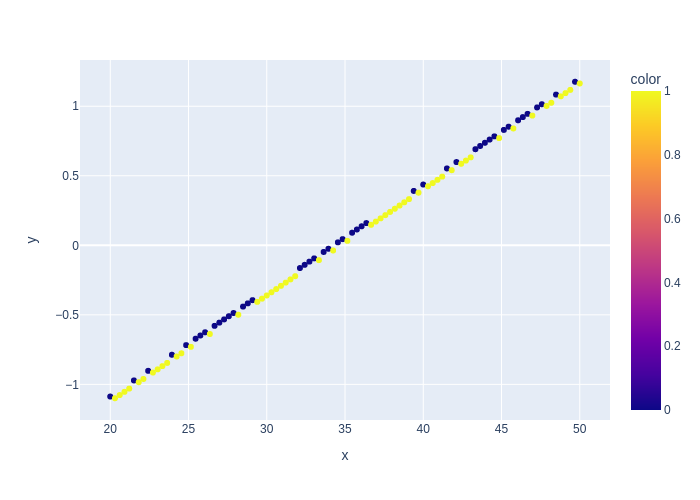

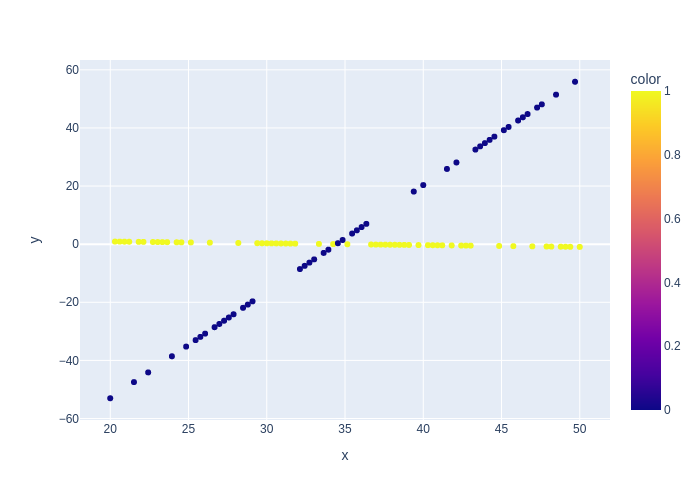

In [3]:
import plotly.express as px
import numpy as np

# Simulate data for continuous predictor age
age_vals = np.linspace(20, 50, 100)
# Add some random noise for illustration
internet_usage_vals = np.random.choice([0, 1], size=100)
sales_vals_additive = log_reg_additive.params['Intercept'] + \
                      log_reg_additive.params['age'] * age_vals + \
                      log_reg_additive.params['internet_usage'] * internet_usage_vals
sales_vals_interaction = log_reg_interaction.params['Intercept'] + \
                         log_reg_interaction.params['age'] * age_vals + \
                         log_reg_interaction.params['internet_usage'] * internet_usage_vals + \
                         log_reg_interaction.params['age:internet_usage'] * age_vals * internet_usage_vals

fig_additive = px.scatter(x=age_vals, y=sales_vals_additive, color=internet_usage_vals)
fig_interaction = px.scatter(x=age_vals, y=sales_vals_interaction, color=internet_usage_vals)

fig_additive.show(renderer="png")
fig_interaction.show(renderer="png")

## Question 4: Contradiction Between Statements
**R-squared and Model Explanation:** 
- The R-squared value of 17.6% tells us that only a small proportion of the total variability in the outcome is explained by the model. This low value suggests that other variables, unaccounted for in the model, might have substantial influence, or that the outcome has a high degree of intrinsic randomness that the model cannot explain. R-squared, therefore, reflects the model’s overall explanatory power, but not the strength or significance of individual predictors.

**P-values and Predictor Significance:**
- P-values for individual coefficients test whether each predictor has a statistically significant relationship with the outcome, assuming all other variables in the model are held constant. When coefficients show “strong or very strong evidence” against the null hypothesis (low p-values), it indicates that these predictors have a reliable association with the outcome, even if the model as a whole does not capture much of the outcome’s variability. High coefficient values imply that these predictors have a relatively large effect on the outcome, but again, they do not imply that these effects account for a large proportion of total variation in the outcome.

 # POSTLECTURE

## Question 5: Code Cells

### Cell 1:
- 50-50 Split Setup: We calculate a 50% split size based on the total number of rows in pokeaman. This size will later be used to ensure that exactly half of the dataset is allocated to training.

- Handling Missing Data: The fillna('None') function replaces any missing values in the Type 2 column with "None". This is useful because missing data could interfere with model training.

-    Data Splitting: With train_test_split, we split pokeaman into two parts:
      -  pokeaman_train (training set) with 50% of the data
       - pokeaman_test (testing set) with the remaining 50%

 -   The random seed (np.random.seed(130)) ensures that this split is reproducible. Each time this code is run with the same seed, the training and testing sets will have the same data, allowing for consistent results across runs.

This setup is essential for evaluating model performance both "in-sample" (on the training data) and "out-of-sample" (on the testing data), as it will allow us to compare how well our model generalizes to new data.

### Cell 2:
in this cell, we’re creating and fitting a simple linear regression model to predict HP (Health Points) based on two predictors, Attack and Defense, using the training dataset pokeaman_train:

 -   Model Specification: The formula 'HP ~ Attack + Defense' specifies that HP is the outcome variable we want to predict, with Attack and Defense as the predictors. This is a simple linear regression with an additive model, meaning that HP is modeled as a linear combination of Attack and Defense without any interaction terms.

   - Model Fitting: We use smf.ols() from statsmodels.formula.api to define the model and .fit() to estimate the model parameters (intercept and coefficients for Attack and Defense) based on the training data. The fitting process determines the best values for these parameters by minimizing the residual sum of squares.

 -   Model Summary: model3_fit.summary() provides a detailed output, including:
     -   Coefficient Estimates: These show the estimated effects of Attack and Defense on HP.
     -   P-values: These indicate the statistical significance of each predictor.
     -   R-squared: The in-sample R-squared value here tells us how much of the variability in HP is explained by Attack and Defense in the training data.
     
### Cell 3:
- Out-of-Sample Predictions: yhat_model3 = model3_fit.predict(pokeaman_test) generates predictions for HP in the testing set (pokeaman_test) using the model that was fit on the training data. This step enables us to evaluate how well the model generalizes to new data.

- In-Sample R-squared: model3_fit.rsquared retrieves the R-squared value from the training data. This in-sample R-squared shows the proportion of variability in HP that is explained by Attack and Defense within the training data, giving a measure of how well the model fits the data it was trained on.

- Out-of-Sample R-squared Calculation:

   - y = pokeaman_test.HP assigns the actual HP values from the testing data to y.
    np.corrcoef(y, yhat_model3)[0,1]**2 calculates the squared correlation between the actual HP values (y) and the predicted HP values (yhat_model3) for the testing data.
   - This squared correlation represents the out-of-sample R-squared, providing a measure of how well the model’s predictions align with actual values in the test set.

Comparing the in-sample and out-of-sample R-squared values reveals the model's generalizability. A significant drop from the in-sample to the out-of-sample R-squared would suggest potential overfitting, meaning the model may be too tailored to the training data and less effective on new data.

### Cell 4:
- Complex Model Specification: The formula 'HP ~ Attack * Defense * Speed * Legendary * Q("Sp. Def") * Q("Sp. Atk")' includes the predictors Attack, Defense, Speed, Legendary, Sp. Def, and Sp. Atk, along with all possible interaction terms among these variables. The * notation between variables expands to include both the individual predictors and their interactions (up to the highest specified level in the formula), resulting in a very complex model.

  -  Interactions: Including interactions like Attack * Defense means that the model accounts not only for the independent effects of Attack and Defense but also how the relationship between them influences HP. Higher-order interactions (e.g., Attack * Defense * Speed) allow the model to capture even more nuanced relationships, though this complexity also increases the risk of overfitting.

- Quoted and Categorical Variables:

   - Q("Sp. Def") and Q("Sp. Atk") are wrapped in Q() because these column names contain spaces, which need quoting for compatibility with statsmodels.
   - Legendary is included as a binary variable, distinguishing between legendary and non-legendary Pokémon.

- Model Fitting: As with the simpler model, smf.ols() and .fit() are used to specify and fit this complex model on the training data (pokeaman_train). The summary output (model4_fit.summary()) provides details on each coefficient, including their estimated values, p-values, and confidence intervals, along with R-squared values for the training data.

### Cell 5:
- Out-of-Sample Predictions: yhat_model4 = model4_fit.predict(pokeaman_test) generates predicted HP values for the testing data (pokeaman_test) using the fitted model from the training data. This lets us evaluate how well the complex model generalizes to new data.

- In-Sample R-squared: model4_fit.rsquared provides the R-squared value for the training data, which indicates the proportion of variability in HP explained by the model’s predictors and their interactions. Given the complexity of the model, we expect a high in-sample R-squared because the numerous interactions capture a significant amount of variance in the training data.

- Out-of-Sample R-squared Calculation:

   - y = pokeaman_test.HP assigns the actual HP values from the test set to y.
    np.corrcoef(y, yhat_model4)[0,1]**2 calculates the squared correlation between the actual and predicted HP values for the test set, giving the out-of-sample R-squared.

- This out-of-sample R-squared reflects how well the model’s predictions match actual outcomes in unseen data. A large drop from in-sample to out-of-sample R-squared would suggest overfitting: the model performs well on the training data but does not generalize to new data, indicating it has likely captured noise or idiosyncratic patterns specific to the training data.

By comparing the R-squared values for both the simple and complex models, we can evaluate whether the added complexity improves generalizability. A high in-sample R-squared combined with a low out-of-sample R-squared, especially in the complex model, would reveal overfitting, highlighting the importance of using both metrics to ensure reliable, generalizable predictions.

## Question 6: model4_linear_form

**Design Matrix and Multicollinearity:**
- The model4_linear_form specification includes many predictors and high-order interactions between Attack, Defense, Speed, Legendary, Sp. Def, and Sp. Atk. This complex form creates new predictor variables in the design matrix (model4_spec.exog) for each main effect and interaction term.
- The resulting design matrix is very high-dimensional, with columns representing the original variables and their interactions. Some predictors become highly correlated, or even nearly linearly dependent, leading to multicollinearity. In np.corrcoef(model4_spec.exog), this manifests as high correlation values between columns, confirming multicollinearity in the design matrix.

**Condition Number as a Diagnostic for Multicollinearity:**
- The condition number of the design matrix, found in model4_fit.summary().tables[-1] under "Cond. No.," is an indicator of multicollinearity. A very large condition number suggests that multicollinearity is present, creating numerical instability in estimating the coefficients.
- Even after centering and scaling the continuous predictors (as done in model4_CS_fit), which typically helps reduce multicollinearity by standardizing the predictors, the condition number remains extremely high (2.25 quadrillion). This confirms that the design matrix’s multicollinearity is not merely due to differing predictor scales but is inherent to the model’s complexity.

**Impact of Multicollinearity on Generalizability:**
- High multicollinearity makes the model highly sensitive to small fluctuations in the data, resulting in large coefficient estimates that fit the training data well but do not generalize to new data. This sensitivity leads to overfitting, where the model captures patterns specific to the training data (including noise) rather than robust relationships that would apply to new data.
- The extremely high condition number in model4 demonstrates that multicollinearity severely compromises the model’s generalizability. This overfitting is evidenced by the large discrepancy between the in-sample and out-of-sample R-squared values observed for model4_fit.

The model4_linear_form creates a complex design matrix with high multicollinearity due to many interaction terms, as shown by an extremely large condition number. This multicollinearity leads to overfitting, as the model becomes too specific to the training data and performs poorly on new data.


## Question 7: model5_linear_form
**From model3 to model5:**
- Model3 is a simple baseline model that only includes the main effects of Attack and Defense.
- Model4 attempts to capture complex interactions among multiple predictors, but it’s overly complex relative to the dataset size, leading to multicollinearity and overfitting, as seen by poor out-of-sample performance.
- Model5 is designed to address overfitting by retaining key variables (Attack, Defense, Speed, Legendary, and stats such as Sp. Def and Sp. Atk) and categorical predictors for generation and types without excessive interactions. This simplifies the model, reducing multicollinearity, and helps it perform more reliably on new data.

**From model5 to model6:**
- Model6 builds on the predictors found most significant in Model5. It narrows the focus by only including the most relevant continuous predictors and a subset of specific categorical indicators (for example, selected generations and types with strong effects).
- This model strikes a balance between simplicity and generalizability by incorporating significant predictors without overloading interactions. As a result, it likely improves predictive power in a more generalizable way, as seen in more stable in-sample and out-of-sample R-squared values.

**From model6 to model7:**
- Model7 adds limited interaction terms among key continuous predictors while retaining the most significant categorical indicators from Model6. This model further optimizes fit without the pitfalls of Model4’s excessive interactions.
- To address potential multicollinearity, the centered and scaled version of Model7 reduces variance inflation from high-magnitude coefficients and lowers the condition number to 15.4. This indicates manageable multicollinearity, helping achieve reliable out-of-sample performance.

Each model progression from Model3 to Model7 is informed by balancing complexity and generalizability. By gradually refining predictors and reducing interaction terms, these models evolve to capture essential relationships backed by sufficient evidence, improving predictions while mitigating overfitting and multicollinearity.

## Question 8: Model Performance Metric

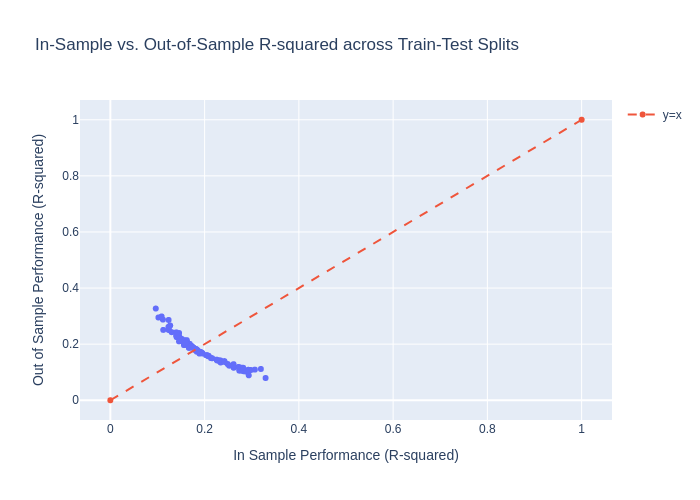

In [5]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
pokeaman = pd.read_csv(url)
pokeaman.fillna('None', inplace=True)
# Using the pokeaman dataset from previous examples
# Define model specification
linear_form = 'HP ~ Attack + Defense'

# Number of repetitions
reps = 100
in_sample_Rsquared = np.zeros(reps)
out_of_sample_Rsquared = np.zeros(reps)

# Run loop to repeatedly split data, fit model, and calculate R-squared
for i in range(reps):
    # Split data randomly each time
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5)
    
    # Fit the model on the training data
    model_fit = smf.ols(formula=linear_form, data=pokeaman_train).fit()
    
    # Store in-sample R-squared
    in_sample_Rsquared[i] = model_fit.rsquared
    
    # Calculate and store out-of-sample R-squared
    out_of_sample_Rsquared[i] = np.corrcoef(pokeaman_test.HP, model_fit.predict(pokeaman_test))[0, 1]**2

# Create DataFrame for visualization
df = pd.DataFrame({
    "In Sample Performance (R-squared)": in_sample_Rsquared,
    "Out of Sample Performance (R-squared)": out_of_sample_Rsquared
})

# Plot results
fig = px.scatter(df, x="In Sample Performance (R-squared)", y="Out of Sample Performance (R-squared)",
                 title="In-Sample vs. Out-of-Sample R-squared across Train-Test Splits")
fig.add_trace(go.Scatter(x=[0,1], y=[0,1], name="y=x", line_shape='linear', line=dict(dash="dash")))

fig.show(renderer='png')


## Question 9: 
**Sequential Data Splitting:**

   - Rather than splitting data randomly (as with the 50-50 train-test approach), this code uses earlier "Generations" of Pokémon to train the model and then attempts to predict stats for later generations. This approach reflects how data is often used in real-world scenarios—using available historical data to predict future outcomes.
   - This setup tests whether the models trained on earlier generations generalize well to unseen future data (e.g., using Generation 1 to predict Generations 2–6 or using Generations 1–5 to predict Generation 6).

**Comparing Models in Terms of Generalizability:**

   - model7, the more complex model, was shown to have slightly better out-of-sample performance in prior train-test splits. However, the complexity of model7—including four-way interaction terms—can capture noise or idiosyncratic patterns in the training data. This often reduces its ability to generalize well to data from future generations.
   - model6, the simpler model, demonstrates consistently stronger statistical evidence for its coefficients and is more interpretable. Although its out-of-sample R-squared may sometimes be slightly lower than model7 in the random-split approach, it avoids overfitting by focusing only on significant interactions and main effects, leading to a more stable generalization to future generations.

**Results Interpretation:**

   - When training on Generation 1 and predicting future generations, or training on Generations 1–5 to predict Generation 6, both models exhibit drops in out-of-sample R-squared. However, model7 experiences a more pronounced decrease in generalizability than model6. This reinforces the idea that model6’s simpler structure better supports predictions across different data subsets, which is critical for real-world applications.
   - By emphasizing that simpler models (like model6) tend to generalize better when predicting new, unseen data, this code highlights the importance of balancing model complexity with interpretability and evidence for each predictor.